In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
with open('results.pickle', 'rb') as file:
    # Load the pickled list from the file
    results = pickle.load(file)
    
    

In [ ]:
for dfs in results:
    no_al_cost = dfs[0].copy()['Cost']
    for df in dfs:
        df['Cost'] = df['Cost'] / no_al_cost -1

In [ ]:
names=['Small', 'German', 'Deloitte', 'Large', 'LC', 'Small_MC', 'German_MC', 'Deloitte_MC', 'Large_MC', 'LC_all']
strategies=['No AL', 'Benchmark RI', 'Random AL', 'ICP Prob', 'ICP Prob Cost', 'ICP NN Margin', 'ICP NN Margin Cost']

In [ ]:
for dfs, name in zip(results,names):
    #print(name)
    for df, strategy in zip(dfs, strategies):
        print(name)
        print(strategy)
        print(df)
        print('Mean:')
        print(np.mean(df))
        print('\n')

Small
No AL
        AUC      PAUC        BS  Cost
0  0.780906  0.557432  0.169031   0.0
1  0.651163  0.400000  0.247075   0.0
2  0.740489  0.788889  0.244300   0.0
3  0.906015  0.615385  0.184957   0.0
4  0.841492  0.809524  0.197948   0.0
5  0.589245  0.403509  0.279759   0.0
6  0.822997  0.214286  0.262741   0.0
7  0.667073  0.424242  0.265072   0.0
8  0.705797  0.745455  0.248380   0.0
Mean:
AUC     0.745020
PAUC    0.550969
BS      0.233252
Cost    0.000000
dtype: float64


Small
Benchmark RI
        AUC      PAUC        BS      Cost
0  0.780906  0.557432  0.169031  0.000000
1  0.635251  0.432950  0.254904  0.041544
2  0.591033  0.433498  0.293870  0.143637
3  0.869674  0.722222  0.220951  0.092304
4  0.822844  0.866667  0.240565 -0.111736
5  0.631579  0.555556  0.289875 -0.191860
6  0.830749  0.782609  0.264976 -0.103898
7  0.609756  0.448864  0.306190  0.030269
8  0.713043  0.733333  0.264291 -0.071666
Mean:
AUC     0.720537
PAUC    0.614792
BS      0.256073
Cost   -0.019045
dtyp

In [ ]:
metrics=['AUC', 'PAUC', 'BS', 'Cost']

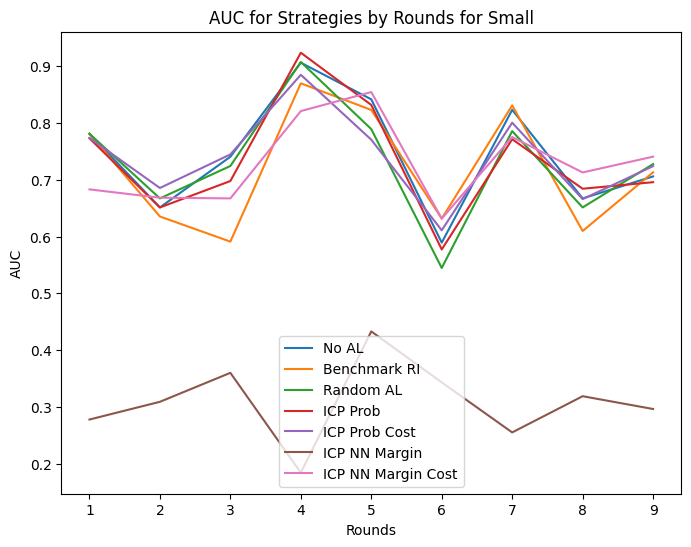

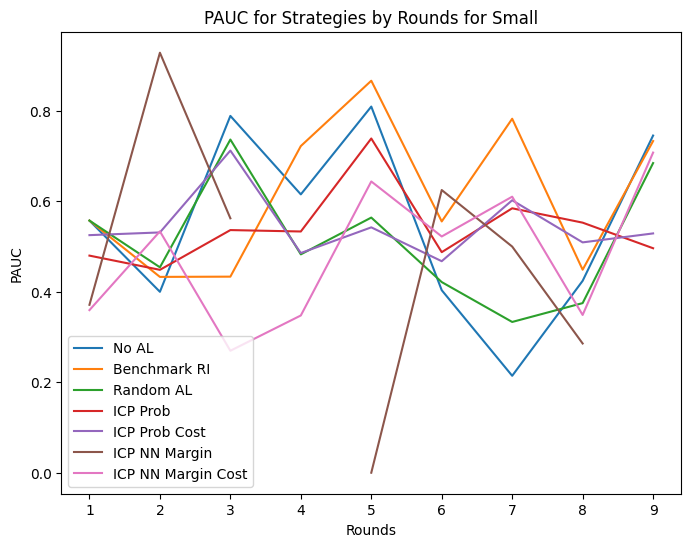

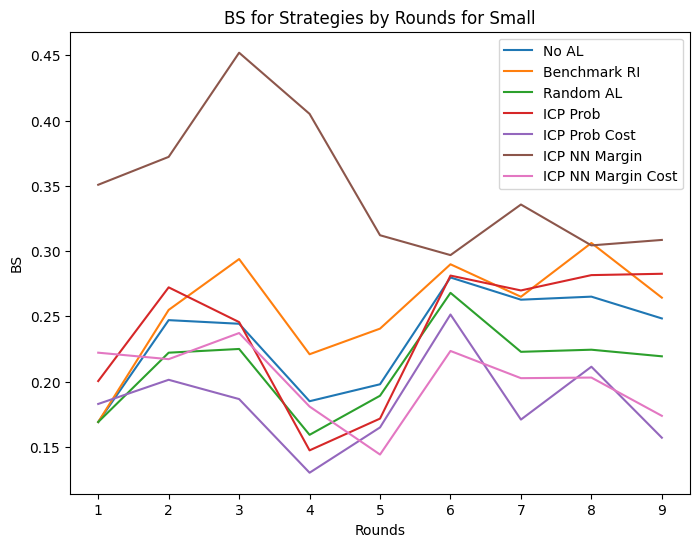

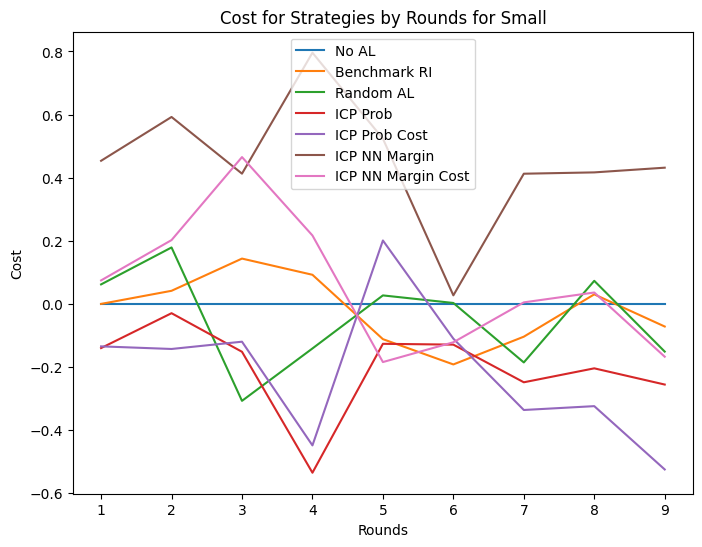

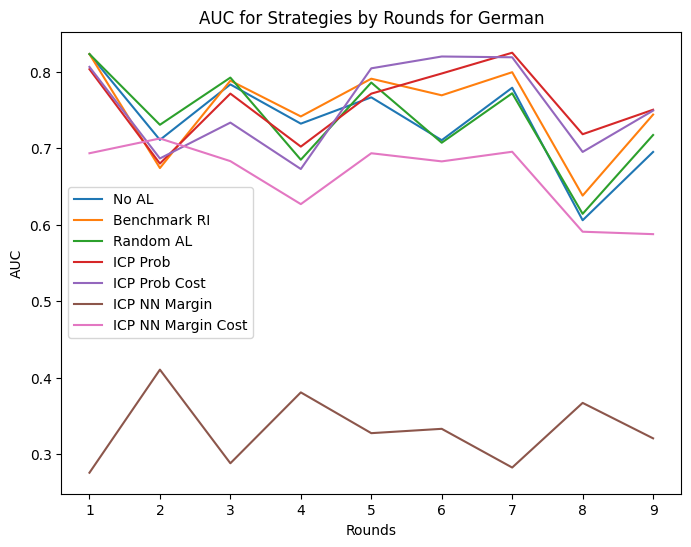

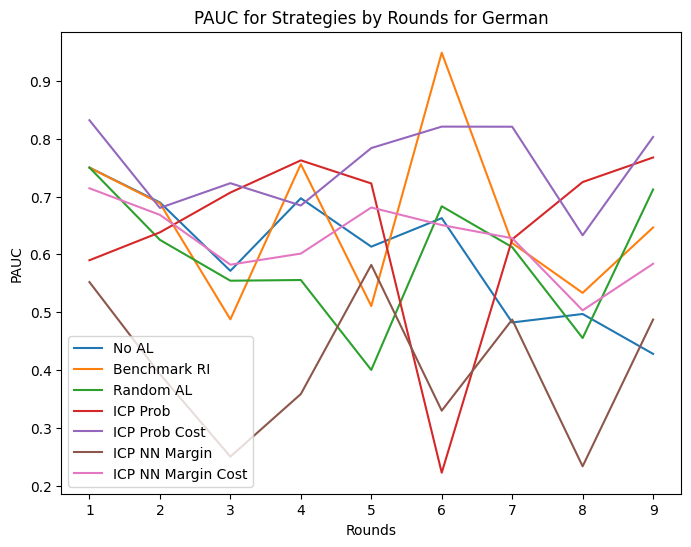

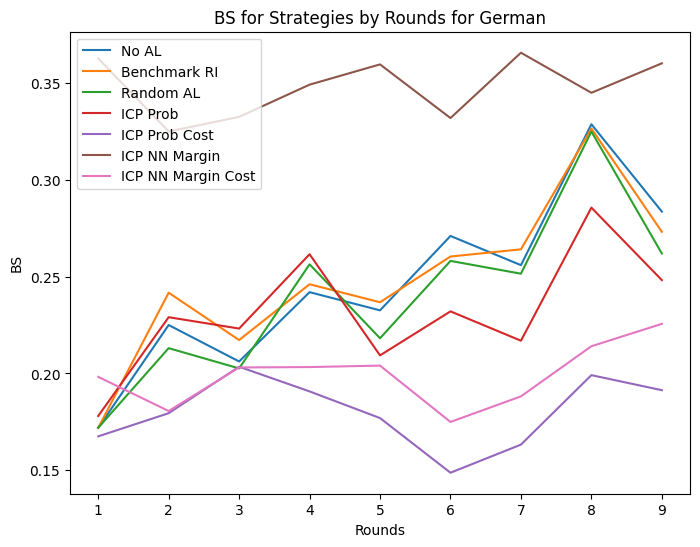

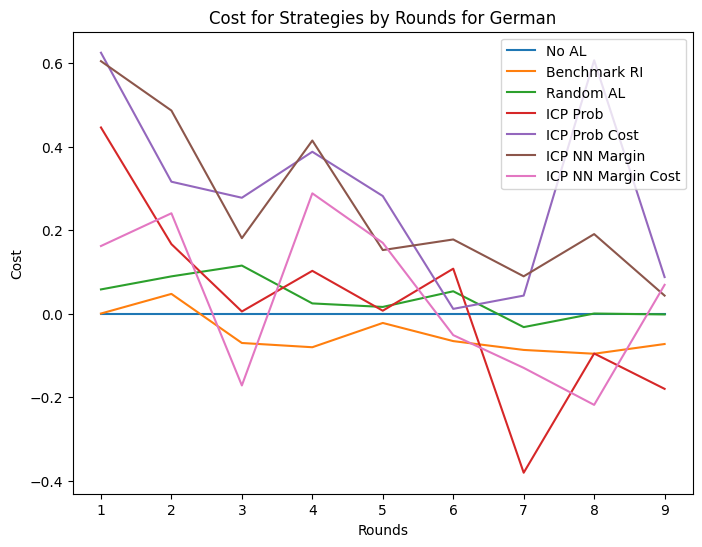

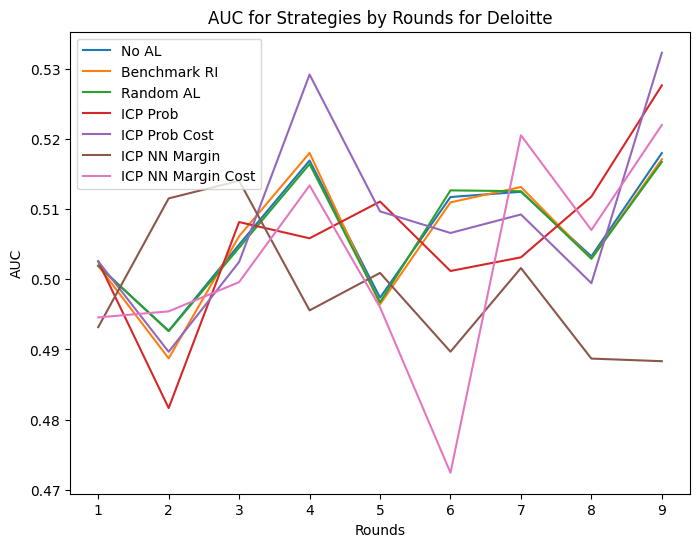

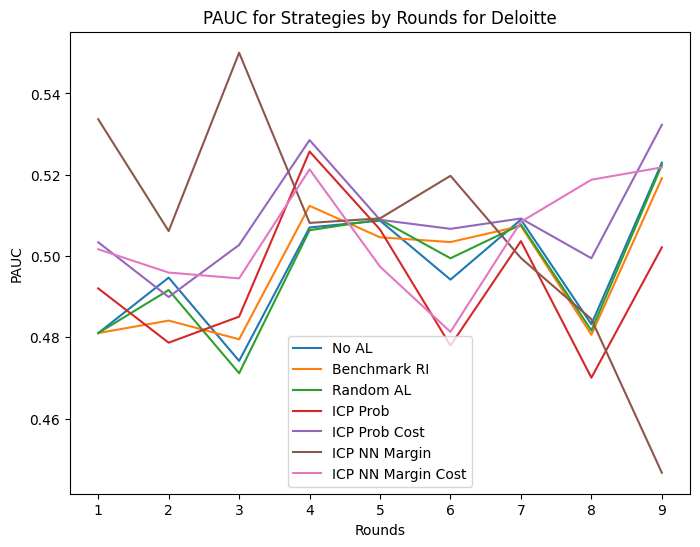

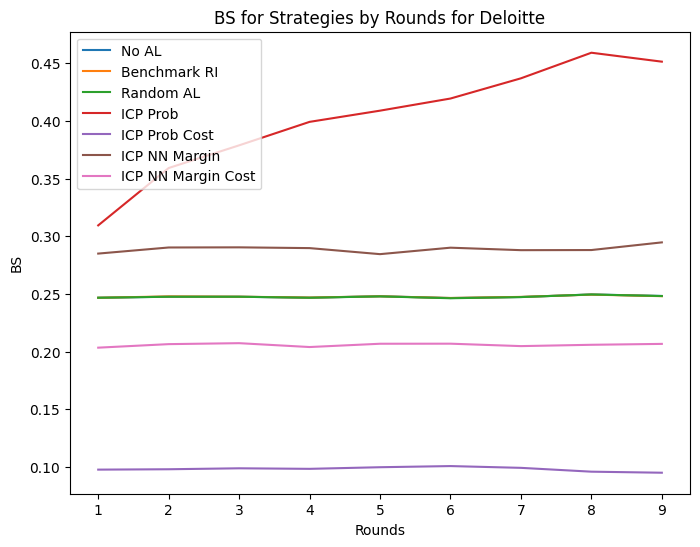

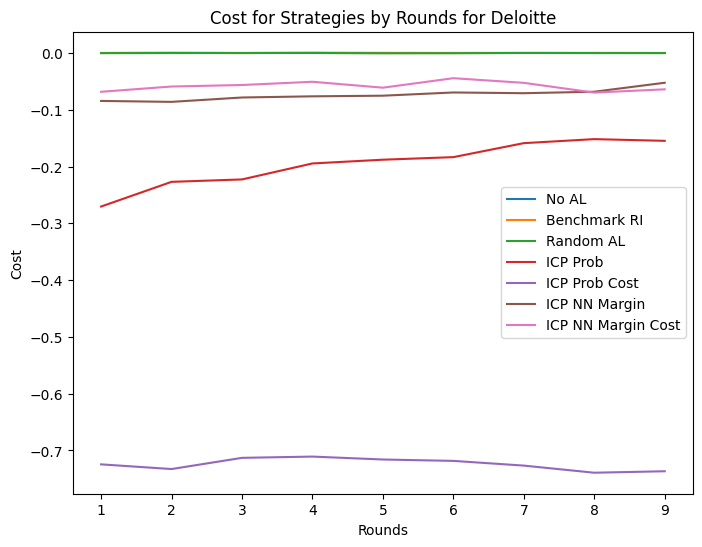

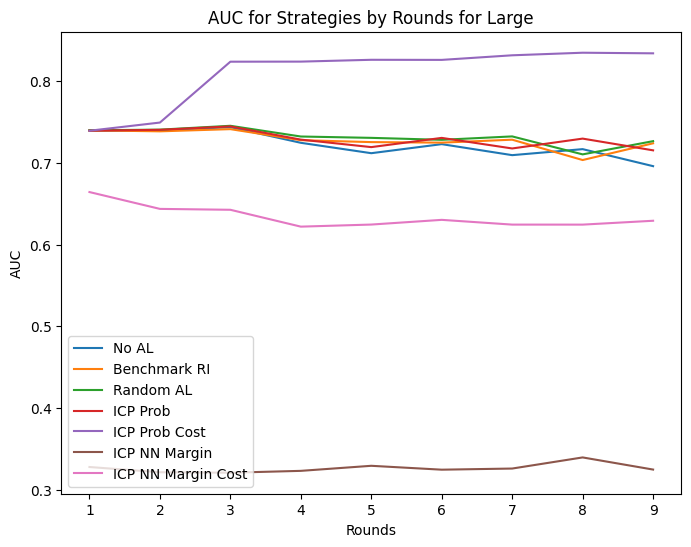

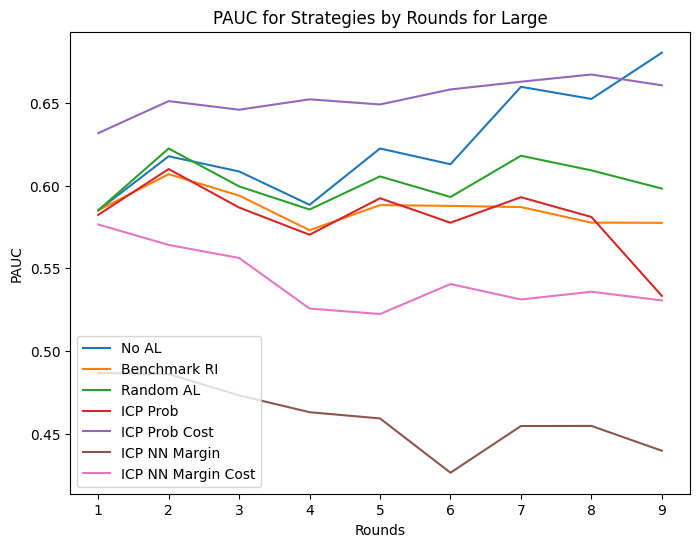

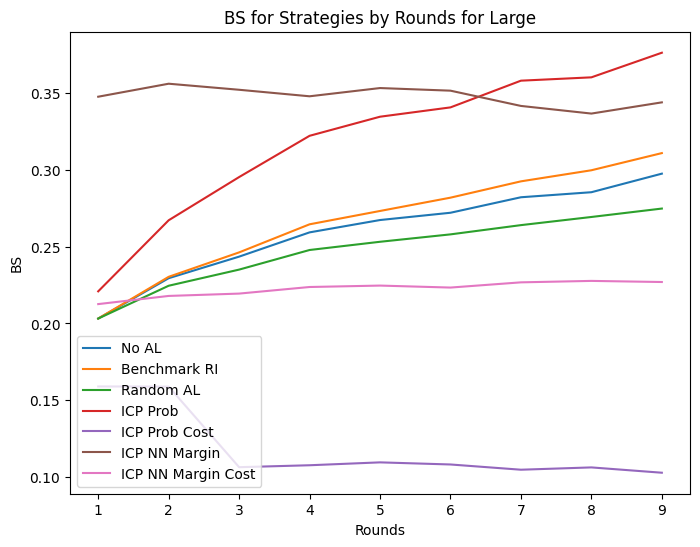

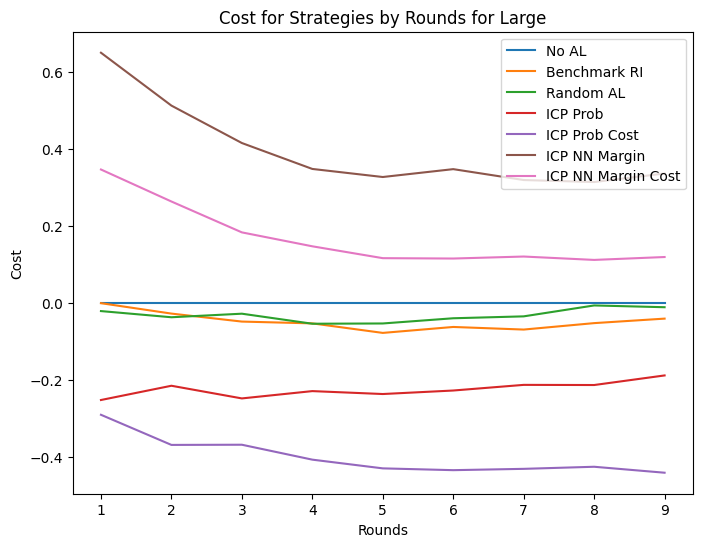

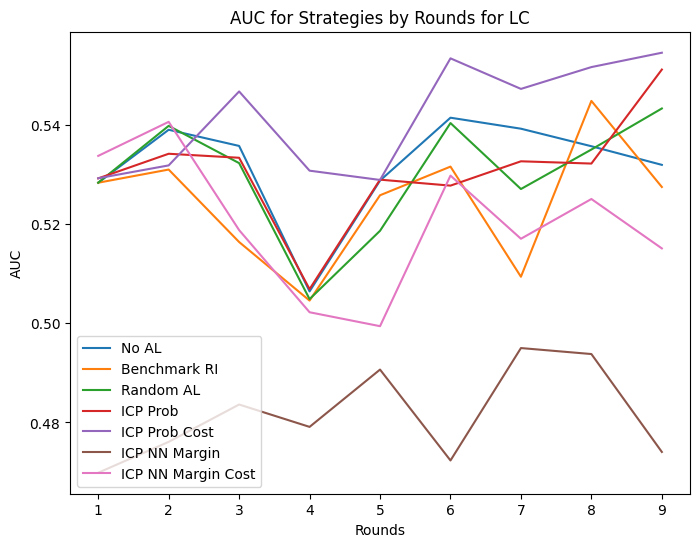

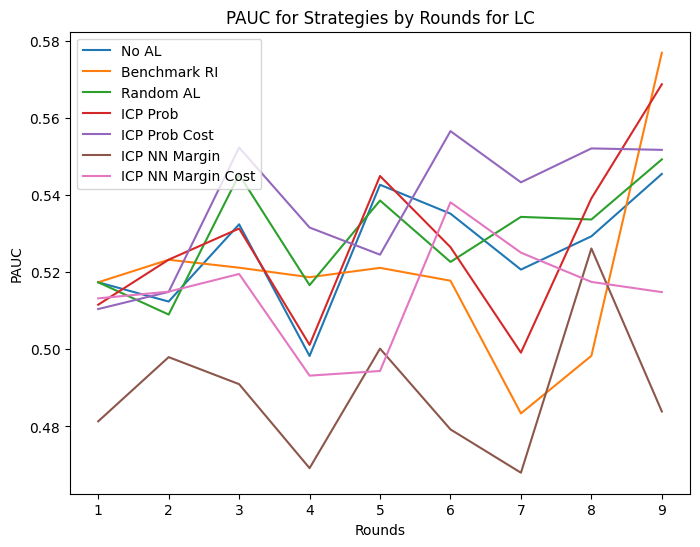

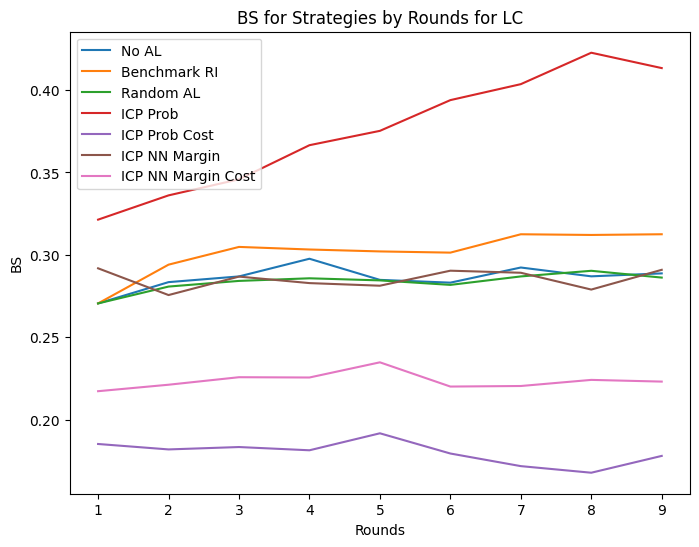

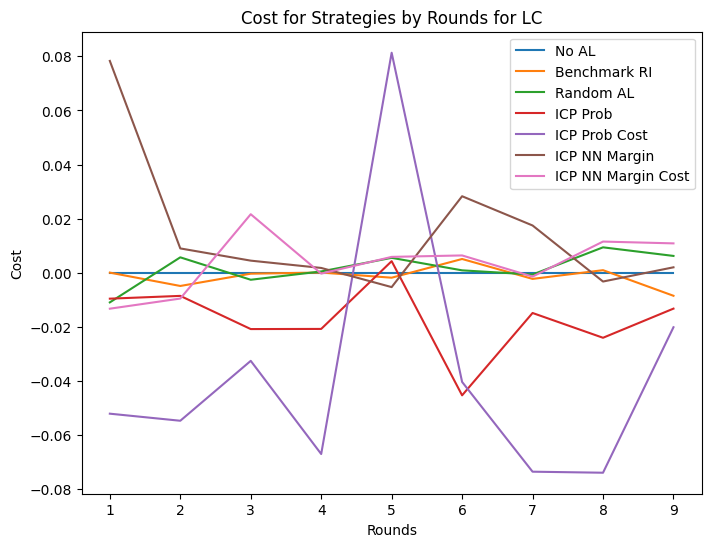

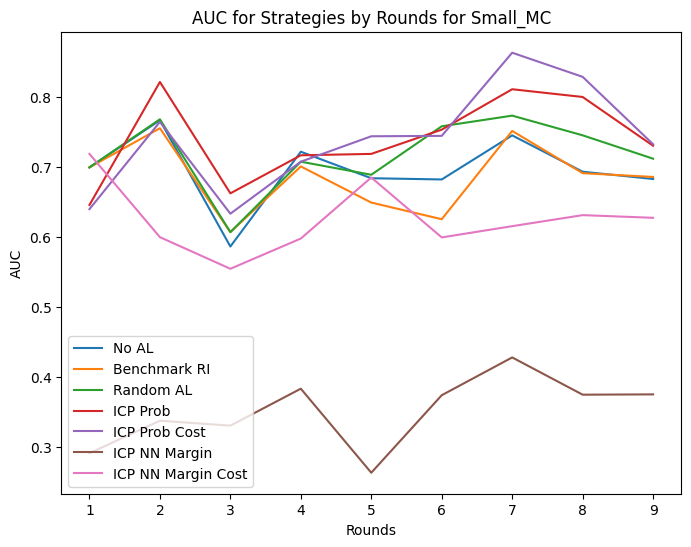

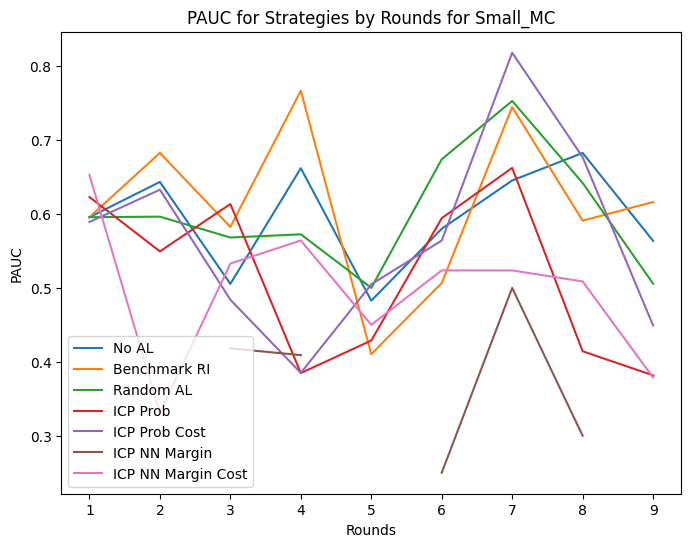

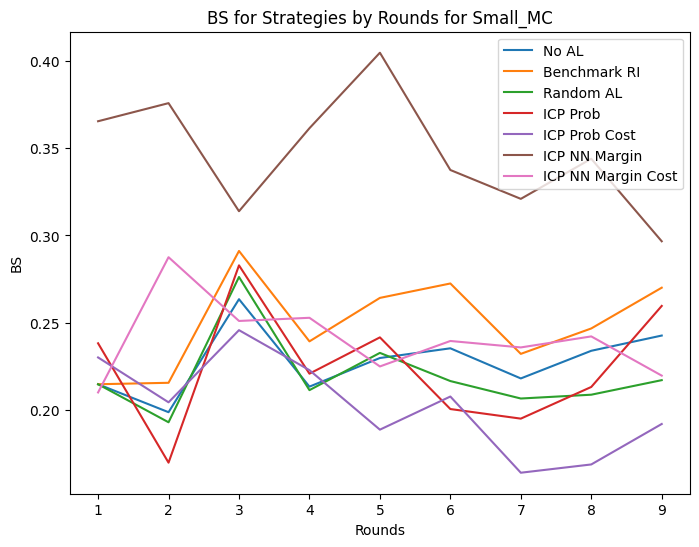

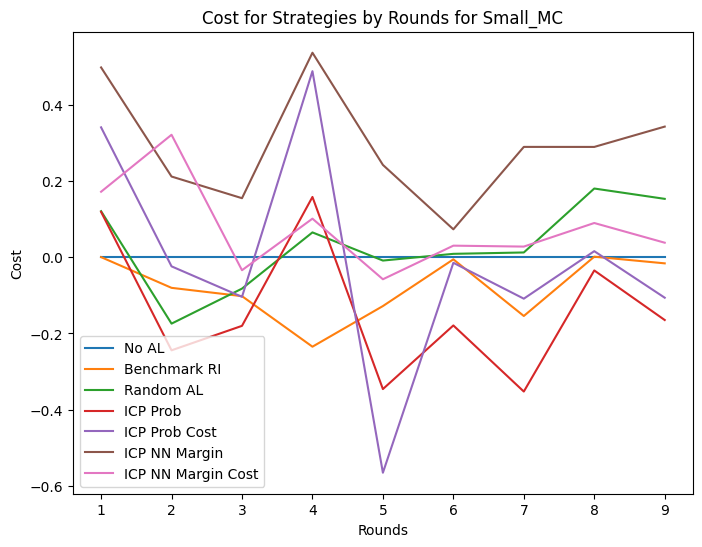

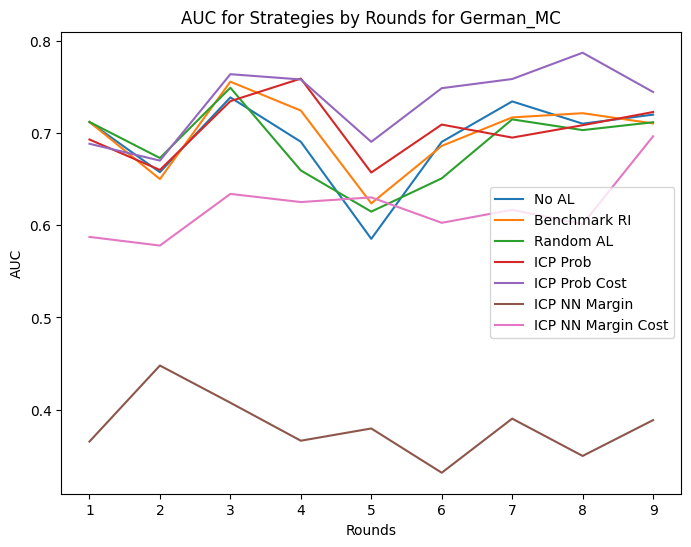

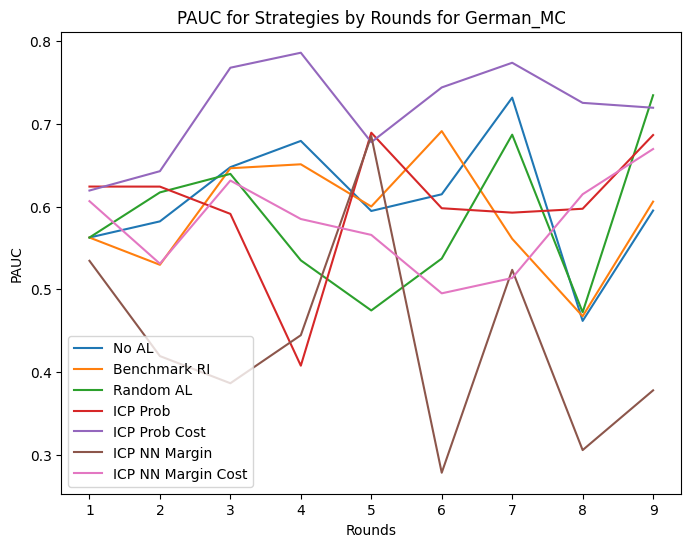

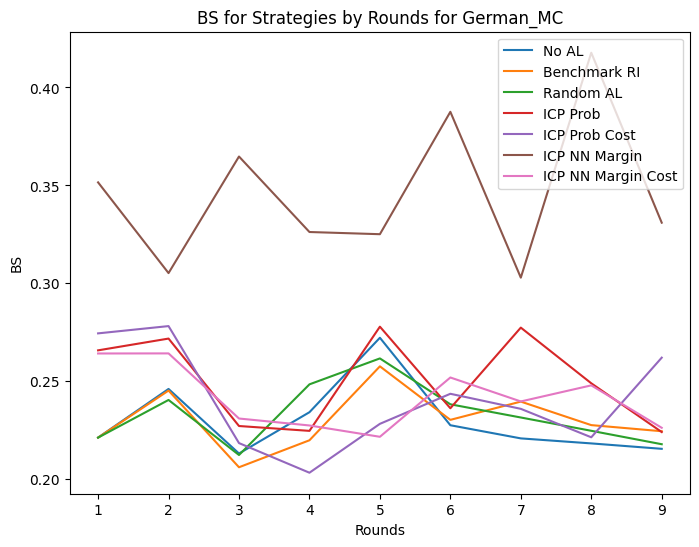

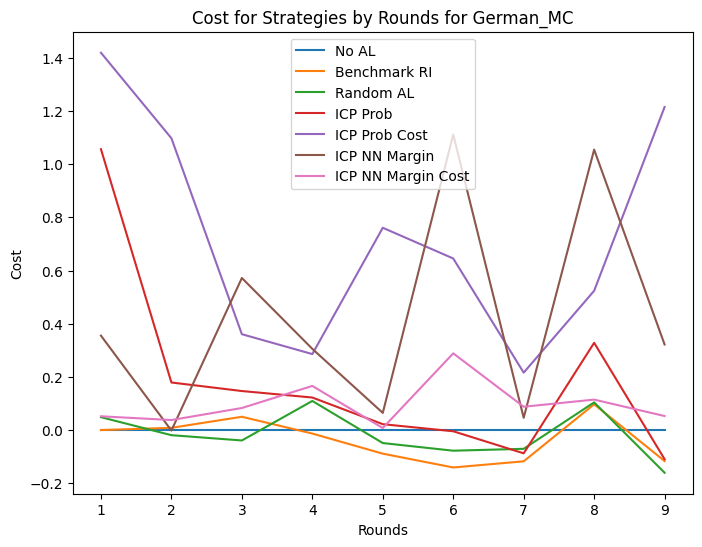

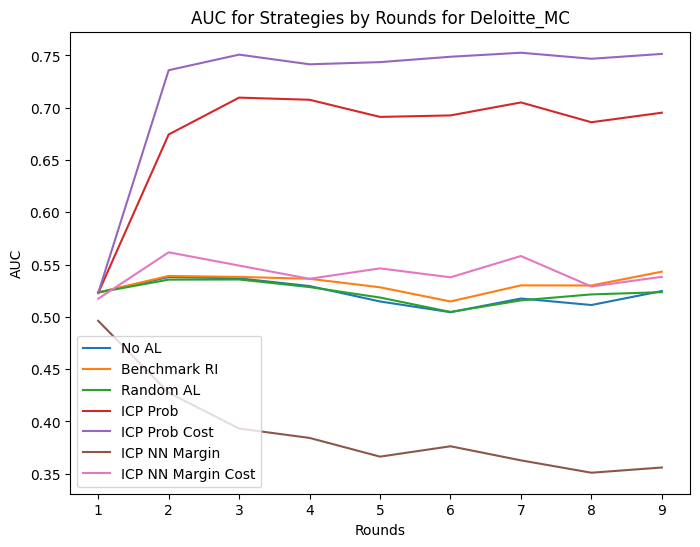

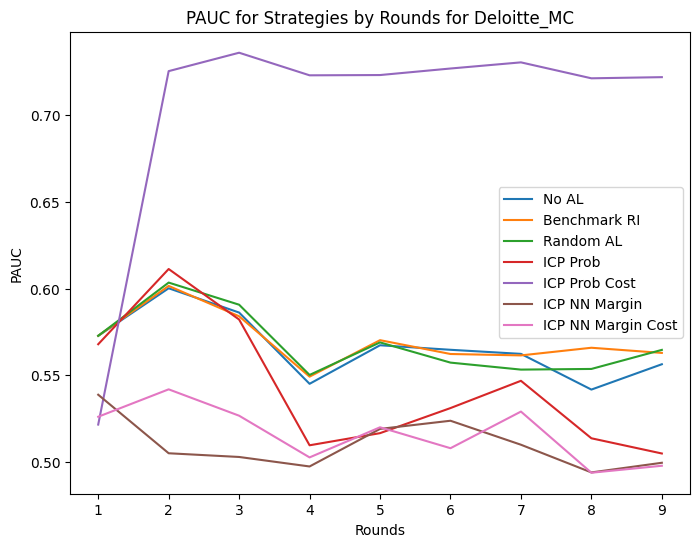

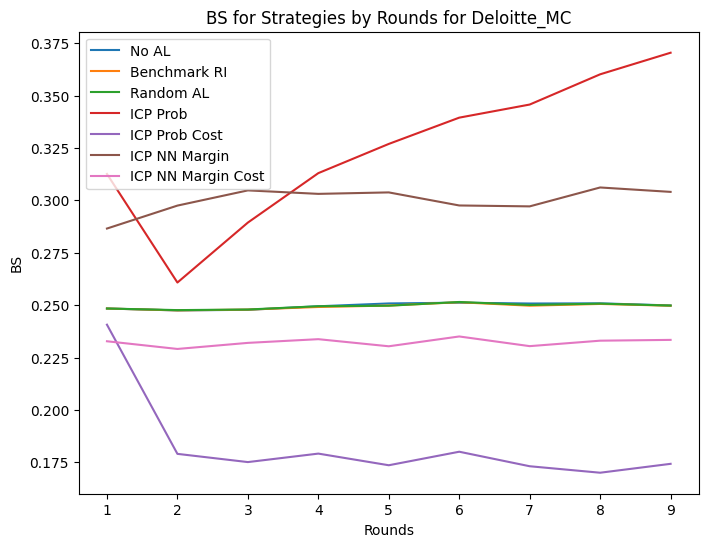

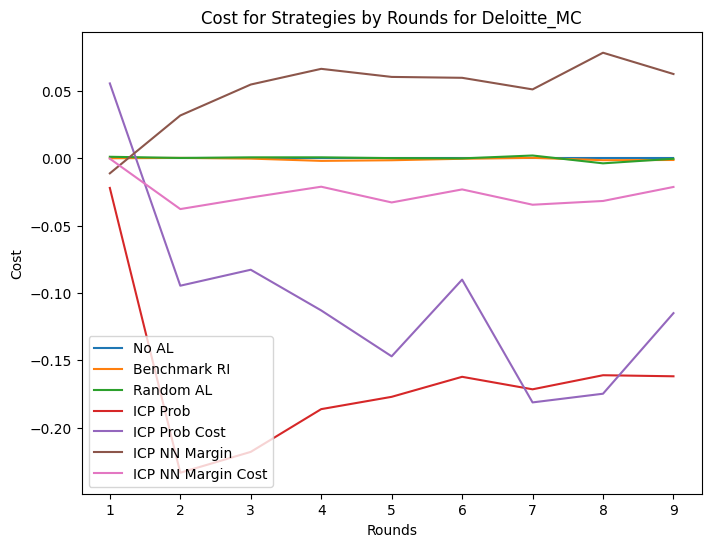

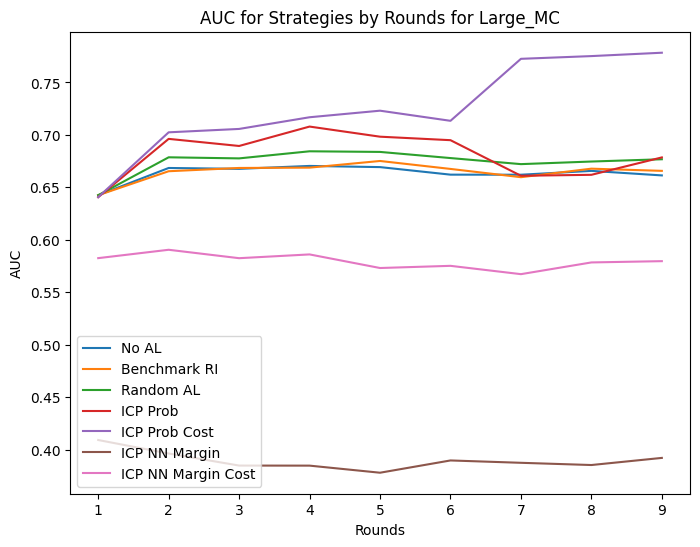

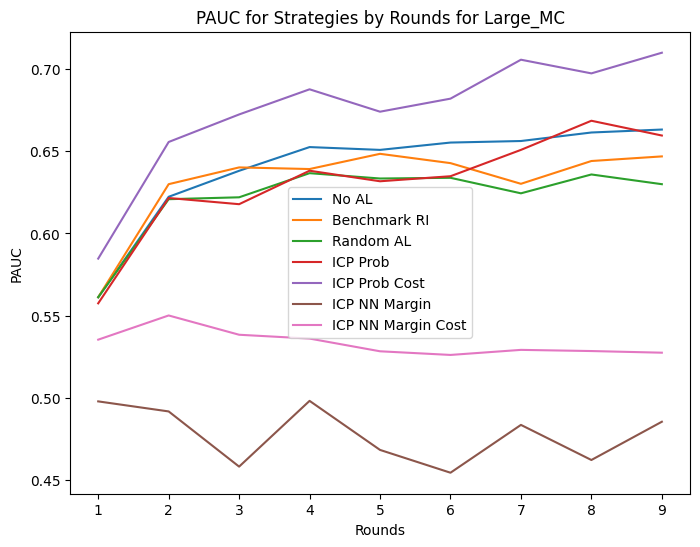

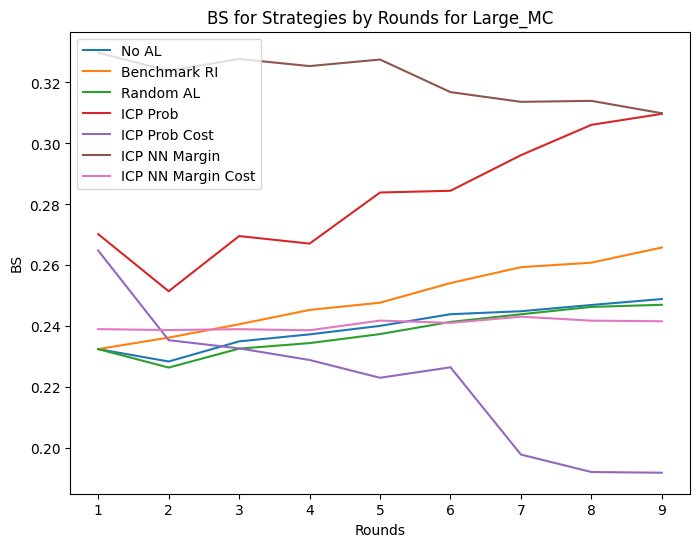

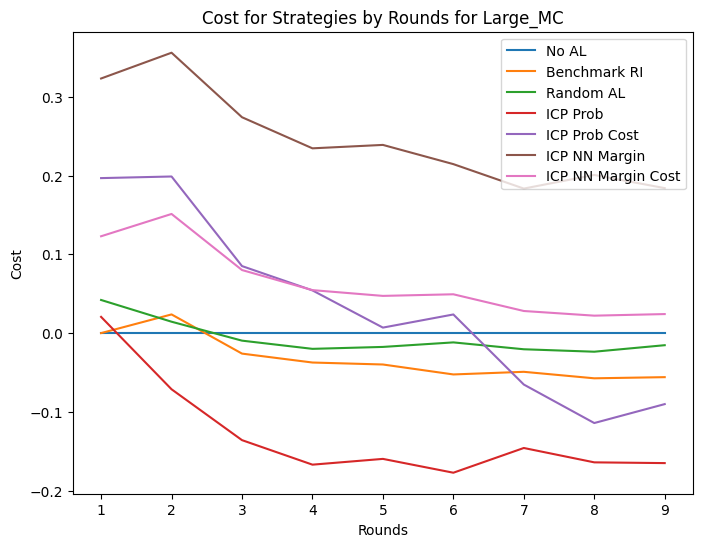

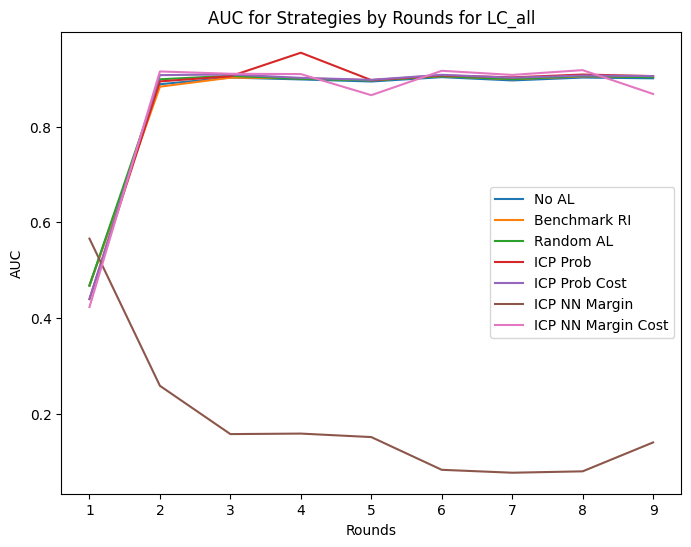

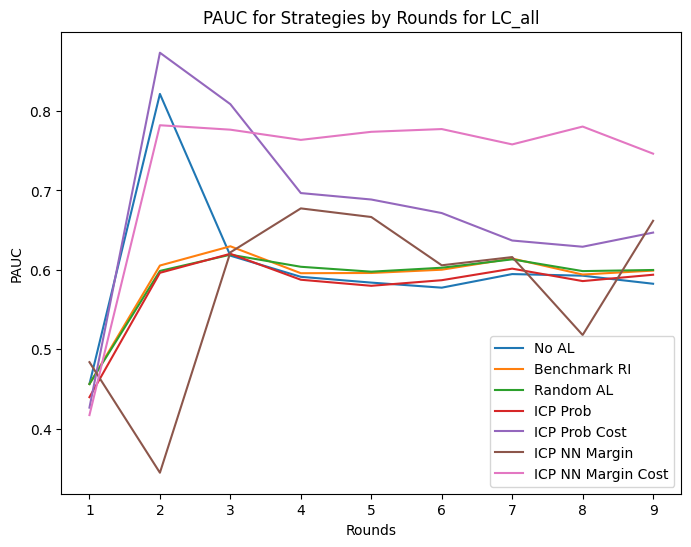

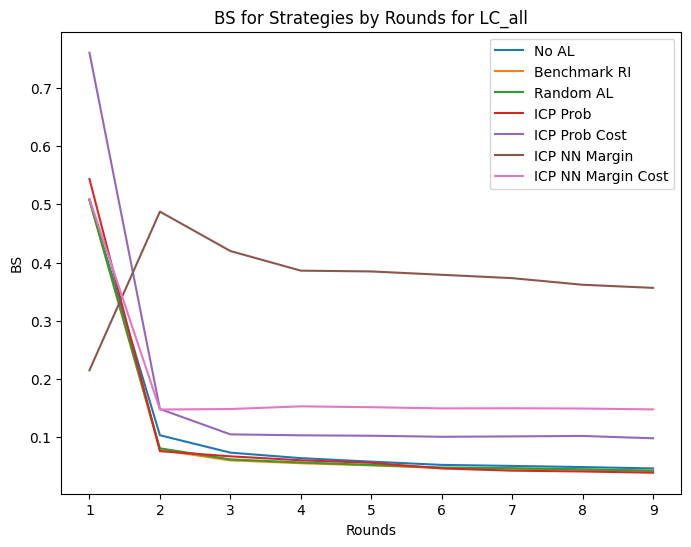

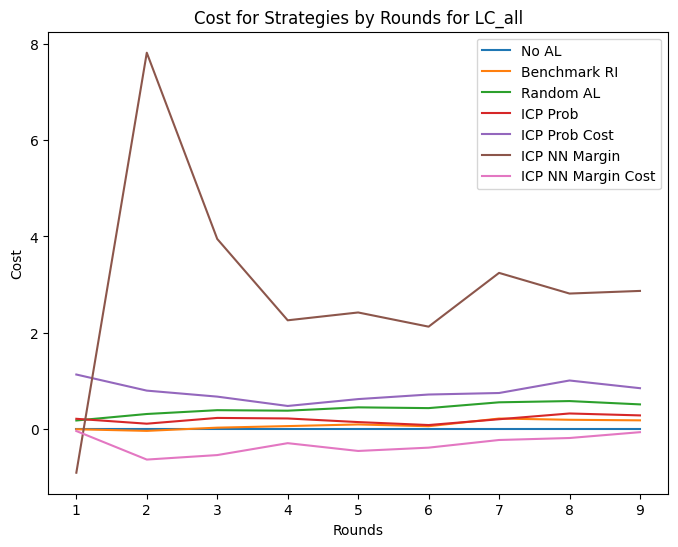

In [ ]:
for dfs, name in zip(results,names):
    #print(name)
    for metric in metrics:
        plot_df=pd.DataFrame(columns=strategies)
        for i in range(len(dfs)):
            plot_df.iloc[:,i] = dfs[i][metric]
        plot_df.index=plot_df.index + 1

        # Set up the plot
        fig, ax = plt.subplots(figsize=(8, 6))

        # Loop through each column and plot the cell values
        for col in plot_df.columns:
            ax.plot(plot_df.index, plot_df[col], label=col)
        # Set labels and title
        ax.set_xlabel('Rounds')
        ax.set_ylabel(metric)
        ax.set_title(metric + ' for Strategies by Rounds for ' + name)

        # Add a legend
        ax.legend()

        # Show the plot
        plt.show()
    print('\n')

# Comparison with no rounds on last round

In [ ]:
with open('results.pickle', 'rb') as file:
    # Load the pickled list from the file
    results = pickle.load(file)

In [ ]:
with open('results_no_rounds.pickle', 'rb') as file:
    # Load the pickled list from the file
    results_no_rounds = pickle.load(file)

In [ ]:
for k in range(len(results_no_rounds)):
    for i in range(len(results_no_rounds[k])):
        results_no_rounds[k][i].loc[1]['Cost'] = results_no_rounds[k][i].loc[1]['Cost'] / results[k][0].loc[8]['Cost'] -1

In [ ]:
results_no_rounds

[[        AUC      PAUC        BS          Cost
  0  0.739399  0.579487  0.198870  49870.158784
  1  0.694203  0.474074  0.232693      0.041660,
          AUC      PAUC        BS          Cost
  0  0.739399  0.579487  0.198870  49870.158784
  1  0.684058  0.513393  0.250677     -0.061497,
          AUC      PAUC        BS          Cost
  0  0.739399  0.579487  0.198870  50830.990541
  1  0.707246  0.448276  0.201409     -0.222963,
          AUC      PAUC        BS          Cost
  0  0.704631  0.530470  0.233900  50581.502027
  1  0.697826  0.462963  0.304905     -0.183763,
          AUC      PAUC        BS          Cost
  0  0.701626  0.524137  0.203636  47699.702703
  1  0.728986  0.561776  0.167139     -0.466255,
          AUC      PAUC        BS          Cost
  0  0.358132  0.405014  0.333574  73466.381757
  1  0.308696       NaN  0.340898      0.277553,
          AUC      PAUC        BS          Cost
  0  0.648364  0.462683  0.240705  69304.403378
  1  0.636232  0.556410  0.205051 

In [ ]:
for dfs in results:
    no_al_cost = dfs[0].copy()['Cost']
    for df in dfs:
        df['Cost'] = df['Cost'] / no_al_cost -1

In [ ]:
for k in range(len(results_no_rounds)):
    for i in range(len(results_no_rounds[k])):
        #results_no_rounds[k][i].loc[0] = results_no_rounds[k][i].loc[1]
        results_no_rounds[k][i].loc[0] = results[k][i].loc[8]
        results_no_rounds[k][i].index=['rounds', 'no rounds']

In [ ]:
print(results_no_rounds[0][0])

                AUC      PAUC        BS     Cost
rounds     0.705797  0.745455  0.248380  0.00000
no rounds  0.694203  0.474074  0.232693  0.04166


In [ ]:
for dfs, name in zip(results_no_rounds,names):
    for strategy, df in zip(strategies, dfs):
        print(name)
        print(strategy)
        print(df)
        print('\n')

Small
No AL
                AUC      PAUC        BS     Cost
rounds     0.705797  0.745455  0.248380  0.00000
no rounds  0.694203  0.474074  0.232693  0.04166


Small
Benchmark RI
                AUC      PAUC        BS      Cost
rounds     0.713043  0.733333  0.264291 -0.071666
no rounds  0.684058  0.513393  0.250677 -0.061497


Small
Random AL
                AUC      PAUC        BS      Cost
rounds     0.727536  0.684615  0.219363 -0.151179
no rounds  0.707246  0.448276  0.201409 -0.222963


Small
ICP Prob
                AUC      PAUC        BS      Cost
rounds     0.695652  0.496296  0.282598 -0.255596
no rounds  0.697826  0.462963  0.304905 -0.183763


Small
ICP Prob Cost
                AUC      PAUC        BS      Cost
rounds     0.723913  0.529070  0.157007 -0.524693
no rounds  0.728986  0.561776  0.167139 -0.466255


Small
ICP NN Margin
                AUC  PAUC        BS      Cost
rounds     0.296377   NaN  0.308523  0.431734
no rounds  0.308696   NaN  0.340898  0.277553


S

# Comparison with no rounds all rounds averaged

In [ ]:
with open('results.pickle', 'rb') as file:
    # Load the pickled list from the file
    results = pickle.load(file)

In [ ]:
with open('results_no_rounds.pickle', 'rb') as file:
    # Load the pickled list from the file
    results_no_rounds = pickle.load(file)

In [ ]:
for k in range(len(results_no_rounds)):
    for i in range(len(results_no_rounds[k])):
        results_no_rounds[k][i].loc[0]['Cost'] = results_no_rounds[k][i].loc[0]['Cost'] / 8
        results_no_rounds[k][i] = pd.DataFrame(results_no_rounds[k][i].mul([8/9, 1/9], axis=0).sum()).T

In [ ]:
for k in range(len(results)):
    for i in range(len(results[k])):
        #results[k][i]= np.mean(results[k][i]).to_frame().T, #columns = results_no_rounds[k][i].columns)
        #results[k][i] = results[k][i].reset_index().T
        #results[k][i].columns = results[k][i].iloc[0]

        # Drop the first row
        #results[k][i] = results[k][i][1:]
        mean_row = results[k][i].mean(axis=0)
        results[k][i] = mean_row.to_frame().T


In [ ]:
for k in range(len(results_no_rounds)):
    benchmark_cost = results[k][0].copy()['Cost']
    for i in range(len(results_no_rounds[k])):
        results_no_rounds[k][i]['Cost'] = results_no_rounds[k][i]['Cost'] / benchmark_cost -1
        results[k][i]['Cost'] = results[k][i]['Cost'] / benchmark_cost -1
        results_no_rounds[k][i].loc[1] = results_no_rounds[k][i].loc[0]
        results_no_rounds[k][i].loc[0] = results[k][i].loc[0]
        results_no_rounds[k][i].index=['rounds', 'no rounds']
        

In [ ]:

for dfs, name in zip(results_no_rounds,names):
    for strategy, df in zip(strategies, dfs):
        print(name)
        print(strategy)
        print(df)
        print('\n')

Small
No AL
                AUC      PAUC        BS      Cost
rounds     0.745020  0.550969  0.233252  0.000000
no rounds  0.734377  0.567775  0.202628 -0.108891


Small
Benchmark RI
                AUC      PAUC        BS      Cost
rounds     0.720537  0.614792  0.256073 -0.019488
no rounds  0.733250  0.572143  0.204626 -0.120795


Small
Random AL
                AUC      PAUC        BS      Cost
rounds     0.730821  0.512167  0.211013 -0.054149
no rounds  0.735827  0.564908  0.199152 -0.124575


Small
ICP Prob
                AUC      PAUC        BS      Cost
rounds     0.733922  0.539857  0.239147 -0.198093
no rounds  0.703875  0.522969  0.241789 -0.123908


Small
ICP Prob Cost
                AUC      PAUC        BS      Cost
rounds     0.739979  0.545034  0.184067 -0.219485
no rounds  0.704666  0.528319  0.199581 -0.201055


Small
ICP NN Margin
                AUC      PAUC        BS      Cost
rounds     0.308650  0.467571  0.348608  0.438500
no rounds  0.352639  0.360012  0.33438

In [ ]:
#overall, there is variation and rounds are not always better. further research needed for factors